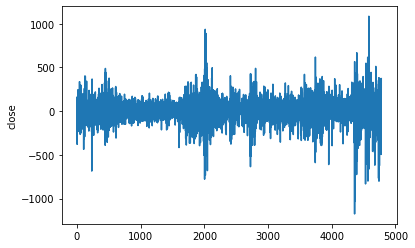

Epoch 1/10
500/500 [==============================] - 17s 35ms/step - loss: 0.0933 - val_loss: 0.0366
Epoch 2/10
500/500 [==============================] - 17s 34ms/step - loss: 0.0383 - val_loss: 0.0403
Epoch 3/10
500/500 [==============================] - 17s 34ms/step - loss: 0.0379 - val_loss: 0.0586
Epoch 4/10
500/500 [==============================] - 17s 35ms/step - loss: 0.0378 - val_loss: 0.0361
Epoch 5/10
500/500 [==============================] - 18s 35ms/step - loss: 0.0377 - val_loss: 0.0355
Epoch 6/10
500/500 [==============================] - 17s 34ms/step - loss: 0.0376 - val_loss: 0.0401
Epoch 7/10
500/500 [==============================] - 17s 34ms/step - loss: 0.0376 - val_loss: 0.0572
Epoch 8/10
500/500 [==============================] - 17s 35ms/step - loss: 0.0374 - val_loss: 0.0389
Epoch 9/10
500/500 [==============================] - 17s 35ms/step - loss: 0.0375 - val_loss: 0.0353
Epoch 10/10
500/500 [==============================] - 17s 34ms/step - loss: 0.037

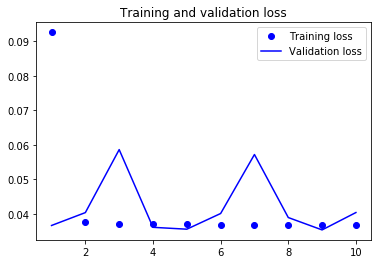

In [2]:
import os
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python import keras
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np
from pandas import read_csv
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('C:\\Users\\Mirela\\PycharmProjects\\untitled2\\data_dir\\DJI.csv',
                      usecols=[4]).values.astype('float32')


def delta_time_series(data):
    return data[1:] - data[:-1]


dataset.shape


def plot_delta(data):
    plt.plot(delta_time_series(data))
    plt.ylabel('close')
    plt.show()


plot_delta(dataset)

dataset = delta_time_series(dataset)

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets

train, val, test = dataset[0:2000, :], dataset[2001:3000, :], dataset[3001:None, :]

lookback = 5
step = 1
batch_size = 128

train_data_gen = TimeseriesGenerator(train, train,
                                     length=lookback, sampling_rate=step, stride=1,
                                     batch_size=batch_size)

val_data_gen = TimeseriesGenerator(val, val,
                                   length=lookback, sampling_rate=step, stride=1,
                                   batch_size=batch_size)

test_data_gen = TimeseriesGenerator(test, test,
                                    length=lookback, sampling_rate=step, stride=1,
                                    batch_size=batch_size)

val_steps = (3000 - 2001 - lookback)
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()

model.add(layers.Flatten(input_shape=(lookback // step,
                                      dataset.shape[-1])))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_data_gen,
                              steps_per_epoch=500,
                              epochs=10,
                              validation_data=val_data_gen,
                              validation_steps=val_steps)
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


Epoch 1/10
500/500 [==============================] - 18s 36ms/step - loss: 0.0453 - val_loss: 0.0370
Epoch 2/10
500/500 [==============================] - 18s 35ms/step - loss: 0.0389 - val_loss: 0.0399
Epoch 3/10
500/500 [==============================] - 18s 35ms/step - loss: 0.0382 - val_loss: 0.0577ETA: 3s - loss:  - ETA: 2s -  - ETA: - ETA: 0s
Epoch 4/10
500/500 [==============================] - 18s 36ms/step - loss: 0.0379 - val_loss: 0.0359
Epoch 5/10
500/500 [==============================] - 18s 36ms/step - loss: 0.0379 - val_loss: 0.0377
Epoch 6/10
500/500 [==============================] - 18s 35ms/step - loss: 0.0375 - val_loss: 0.0401
Epoch 7/10
500/500 [==============================] - 18s 35ms/step - loss: 0.0374 - val_loss: 0.0567
Epoch 8/10
500/500 [==============================] - 18s 35ms/step - loss: 0.0375 - val_loss: 0.0370
Epoch 9/10
500/500 [==============================] - 18s 35ms/step - loss: 0.0373 - val_loss: 0.0353
Epoch 10/10
500/500 [===============

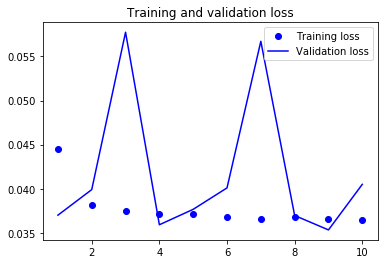

In [3]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32, input_shape=(None, dataset.shape[-1])))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_data_gen,
                              steps_per_epoch=500,
                              epochs=10,
                              validation_data=val_data_gen,
                              validation_steps=val_steps)

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Epoch 1/10
500/500 [==============================] - 19s 38ms/step - loss: 0.0545 - val_loss: 0.0655
Epoch 2/10
500/500 [==============================] - 18s 36ms/step - loss: 0.0384 - val_loss: 0.0538
Epoch 3/10
500/500 [==============================] - 18s 36ms/step - loss: 0.0375 - val_loss: 0.0606
Epoch 4/10
500/500 [==============================] - 18s 37ms/step - loss: 0.0374 - val_loss: 0.0357
Epoch 5/10
500/500 [==============================] - 19s 38ms/step - loss: 0.0373 - val_loss: 0.0389
Epoch 6/10
500/500 [==============================] - 18s 36ms/step - loss: 0.0372 - val_loss: 0.0445
Epoch 7/10
500/500 [==============================] - 18s 36ms/step - loss: 0.0371 - val_loss: 0.0577
Epoch 8/10
500/500 [==============================] - 18s 36ms/step - loss: 0.0371 - val_loss: 0.0361
Epoch 9/10
500/500 [==============================] - 18s 36ms/step - loss: 0.0371 - val_loss: 0.0364
Epoch 10/10
500/500 [==============================] - 18s 37ms/step - loss: 0.037

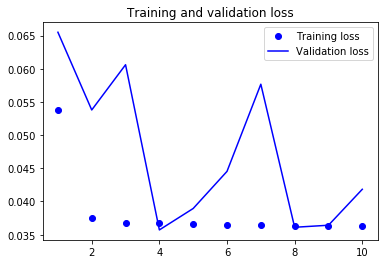

In [4]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32,
                     dropout=0.1,
                     recurrent_dropout=0.5,
                     return_sequences=True,
                     input_shape=(None, dataset.shape[-1])))
model.add(layers.GRU(64, activation='relu',
                     dropout=0.1,
                     recurrent_dropout=0.5))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_data_gen,
                              steps_per_epoch=500,
                              epochs=10,
                              validation_data=val_data_gen,
                              validation_steps=val_steps)
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Epoch 1/10
500/500 [==============================] - 18s 36ms/step - loss: 0.0534 - val_loss: 0.0437
Epoch 2/10
500/500 [==============================] - 18s 37ms/step - loss: 0.0377 - val_loss: 0.0401
Epoch 3/10
500/500 [==============================] - 18s 35ms/step - loss: 0.0374 - val_loss: 0.0584
Epoch 4/10
500/500 [==============================] - 18s 36ms/step - loss: 0.0374 - val_loss: 0.0351
Epoch 5/10
500/500 [==============================] - 18s 36ms/step - loss: 0.0372 - val_loss: 0.0355A: 0s 
Epoch 6/10
500/500 [==============================] - 18s 36ms/step - loss: 0.0374 - val_loss: 0.0403
Epoch 7/10
500/500 [==============================] - 18s 35ms/step - loss: 0.0370 - val_loss: 0.05650
Epoch 8/10
500/500 [==============================] - 18s 36ms/step - loss: 0.0371 - val_loss: 0.0372
Epoch 9/10
500/500 [==============================] - 18s 35ms/step - loss: 0.0370 - val_loss: 0.0355
Epoch 10/10
500/500 [==============================] - 18s 35ms/step - loss

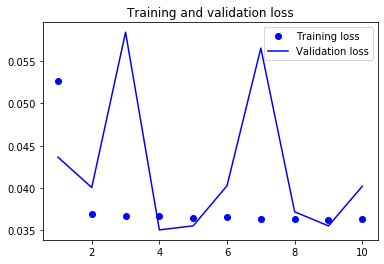

In [5]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32,
                     dropout=0.2,
                     recurrent_dropout=0.2,
                     input_shape=(None, dataset.shape[-1])))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_data_gen,
                              steps_per_epoch=500,
                              epochs=10,
                              validation_data=val_data_gen,
                              validation_steps=val_steps)

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Epoch 1/10
500/500 [==============================] - 19s 38ms/step - loss: 0.0551 - val_loss: 0.0787
Epoch 2/10
500/500 [==============================] - 20s 39ms/step - loss: 0.0384 - val_loss: 0.0500
Epoch 3/10
500/500 [==============================] - 19s 37ms/step - loss: 0.0375 - val_loss: 0.0588
Epoch 4/10
500/500 [==============================] - 19s 37ms/step - loss: 0.0374 - val_loss: 0.0388
Epoch 5/10
500/500 [==============================] - 19s 38ms/step - loss: 0.0373 - val_loss: 0.0366
Epoch 6/10
500/500 [==============================] - 18s 37ms/step - loss: 0.0372 - val_loss: 0.0415
Epoch 7/10
500/500 [==============================] - 20s 39ms/step - loss: 0.0372 - val_loss: 0.0574
Epoch 8/10
500/500 [==============================] - 18s 37ms/step - loss: 0.0370 - val_loss: 0.0355
Epoch 9/10
500/500 [==============================] - 18s 36ms/step - loss: 0.0371 - val_loss: 0.0388
Epoch 10/10
500/500 [==============================] - 19s 38ms/step - loss: 0.037

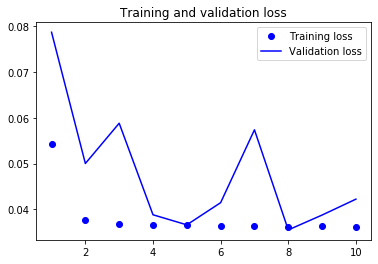

In [6]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32,
                     dropout=0.1,
                     recurrent_dropout=0.5,
                     return_sequences=True,
                     input_shape=(None, dataset.shape[-1])))
model.add(layers.GRU(64, activation='relu',
                     dropout=0.1,
                     recurrent_dropout=0.5))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_data_gen,
                              steps_per_epoch=500,
                              epochs=10,
                              validation_data=val_data_gen,
                              validation_steps=val_steps)
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()